# Housing Prices Dataset Analysis
The following is from Chapter 2 in the Scikit and Tensorflow book, essentially me just following along with the code in the book. Go me!

## First step: fetch the data!
This function creates a directory for the housing data in our workspace, downloads the housing.tgz file, and extracts the housing.csv file.

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

Now fetch the data

In [3]:
fetch_housing_data()

Now to read in the data (and discover why my colleagues hate pandas so much).

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## Explore the data
Now let's load up the data and take a look at it. Notice that the `head` command is a function call within the pandas object.

In [5]:
housing = load_housing_data()

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The `info` function call is much like the `desc` call in SQL. Notice that the `ocean_proximity` field is an `object` type. Here this means it's a string type, but this is very odd. Does this mean a pandas dataframe is flexible to contain any type?

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


The `describe` function call is much like the `summary` function in R.

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Let's look at a plot of this. We can pass a whole dataframe to hist and it will plot it for us. Which is noice!

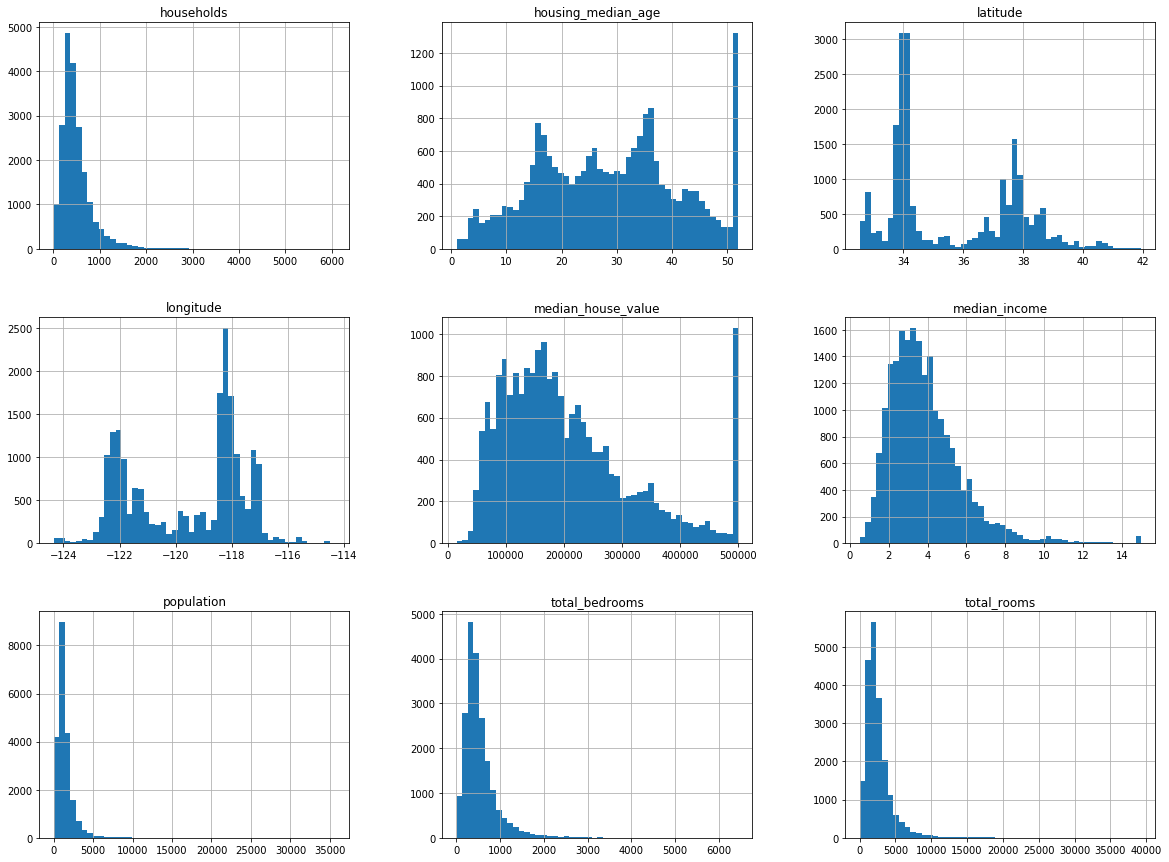

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Splitting the data
Now to write a function that splits the function into train and test.

In [9]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio) # the int function does a truncate
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

This array indexing thing is a bit odd, so let us do a small test to see what is going on:

In [10]:
x = np.random.permutation(10)

x

array([5, 8, 7, 1, 4, 6, 0, 3, 9, 2])

In [11]:
i = 2

x[:i]

array([5, 8])

In [12]:
x[i:]

array([7, 1, 4, 6, 0, 3, 9, 2])

So a `:` before a value creates an array of that size starting from the front and a `:` after the value takes all array elements after that count.

Anyway, back to the test / training split.

In [13]:
train_set, test_set = split_train_test(housing, 0.2)

print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


The book then gets a bit paranoid about ALWAYS having the test set be held out, never allowing it to be part of the training data. Solutions include hard coding the random number seed, saving the data after its first generated. OR using a hash function to sort data into train and test (which is kind of neat, I must say). Here we hack off the last byte of a hash function, which can be a value from 0 to 256, and use that to determine if the sample is train or test.

In [14]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

Since our data does not have an ID column (which is what the hash is using as input), we must create a row index.

In [15]:
housing_with_id = housing.reset_index()

housing_with_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
index                 20640 non-null int64
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


In [16]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

Alternatively, we can just use what scikitlearn has build it, which is pretty much the same as `split_train_test` but with a random number seed passed in.

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

This is fine for creating a purely random data set, but what if we want to ensure that our training data is more representative of the total dataset. In this example we want the distributions of median incomes to be representative. We start by binning the median income into 5 bins.

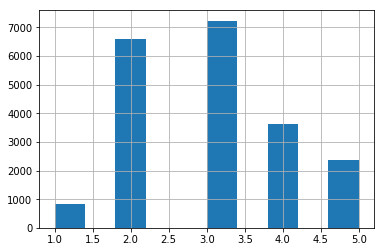

In [24]:
%matplotlib inline 
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].hist(bins=10)
plt.show()

Then we use the sci-kit learn `StratifiedShuffleSplit` to do stratified sampling so that our training data represents the same distributions of median incomes.

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [28]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [29]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

It worked! Let's drop that income_cat category, because it isnt something we should train on.

In [30]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

# Visualizing the data
In which we use multiple plots to further understand the data

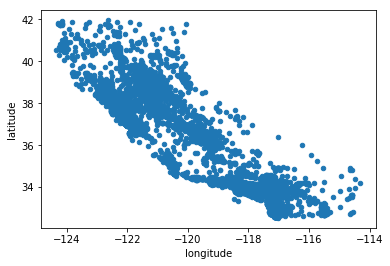

In [32]:
# make a copy to prevent altering the training data
housing = strat_train_set.copy()

# scatter plot of all districts
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

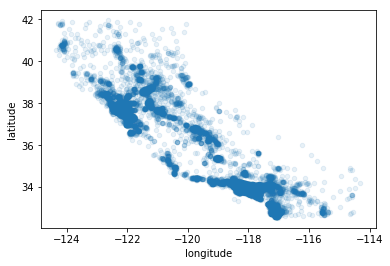

In [33]:
# alpha shading to see denser regions better
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)
plt.show()

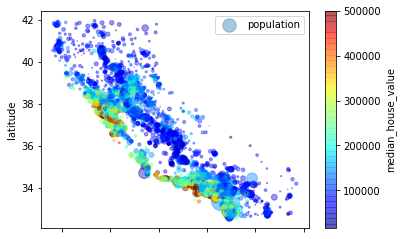

In [35]:
# get more fancy by adding in housing prices and population
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()
plt.show()